# Installing Pysentimiento

In the [Pysentimiento github](https://github.com/pysentimiento/pysentimiento) you can find a link to a [Collab file](https://colab.research.google.com/github/pysentimiento/pysentimiento/blob/master/notebooks/examples/pysentimiento_sentiment_analysis_in_spanish.ipynb#scrollTo=KVnFbpovDEa6) that explains how to install it in a Collab file.

In [2]:
! pip install [https://github.com/pandas-profiling/pandas-profiling/archive/master.zip](https://github.com/pandas-profiling/pandas-profiling/archive/master.zip)
!pip install pysentimiento

/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: ` pip install [https://github.com/pandas-profiling/pandas-profiling/archive/master.zip](https://github.com/pandas-profiling/pandas-profiling/archive/master.zip)'
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 41.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 76.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 KB 49.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 KB 26.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 79.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/11

# Imports

We are importing multiple libraries. 

Numpy is just in case we need to deal with operations

Tensorflow is to use the GPU to increase the speed of our operations

Pysentimiento is the AI model we are using to analyze the dataset

We also use panda to get our dataset written as a csv

We use google.colab in case we want to get files from our drive

We use csv in case we need to work with the a csv without panda

We use matplotlib because we want to plot the data

In [5]:
import numpy as np
import tensorflow as ts
import pandas as pd
import pysentimiento
import csv
from google.colab import files
from pysentimiento import create_analyzer
import matplotlib.pyplot as plt

# Creating the text analyzer using pysentimiento && Importing the dataset

The dataset we are using was taken from [here](https://www.kaggle.com/datasets/kavita5/twitter-dataset-avengersendgame). It contains tweets from 2019, after the Averngers film was realeased. Our duty is to evaluate the amount of positive/negative tweets that were realeased

To import them we user pandas.read_csv with the cp1252 enconding so we can read utf-8 files

Then we split the file by rows and analyze each rows 'text' and using __dict__ we get 'probas'. This way we get another dictionary with the WORD: num
Each row gets its value and at the end it sums each value and gets the total review

In [4]:
analyzer = create_analyzer(task="sentiment", lang="en")
csv_file = pd.read_csv('/content/drive/MyDrive/Notebooks/Datasets/Avengers/tweets.csv', encoding='cp1252')
total = 0
NEG = 0
POS = 0
NEU = 0
for index, row in csv_file.iterrows():
  output = analyzer.predict(row["text"]).__dict__['probas']
  NEG += (output['NEG'])
  NEU += (output['NEU'])
  POS += (output['POS'])
  total += 1
print(f'TOTAL\n NEG:{NEG / total}, NEU:{NEU / total}, POS:{POS / total}')


TOTAL
 NEG:0.028090330326460147, NEU:0.42868193940104293, POS:0.5432277311975602


# Plotting

We make a piechart, because I think it is the best display for the info we are handling. We sets its values and then just show, it is explain better in the "Welcome to Colab" tutorial

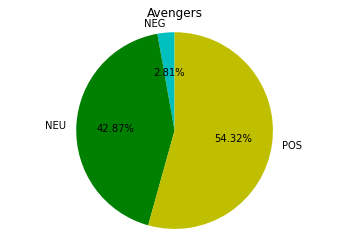

In [10]:
plt.pie([NEG, NEU, POS], labels=["NEG", "NEU", "POS"], colors=['c', 'g', 'y'], startangle = 90, autopct = '%1.2f%%')
plt.axis('equal')
plt.title('Avengers')
plt.show()

@misc
      {perez2021pysentimiento,
      title={pysentimiento: A Python Toolkit for Sentiment Analysis and SocialNLP tasks},
      author={Juan Manuel Pérez and Juan Carlos Giudici and Franco Luque},
      year={2021},
      eprint={2106.09462},
      archivePrefix={arXiv},
      primaryClass={cs.CL}
}